In [24]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [25]:
start=pd.read_csv("50_Startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
start.shape

(50, 5)

In [27]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
start.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [29]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


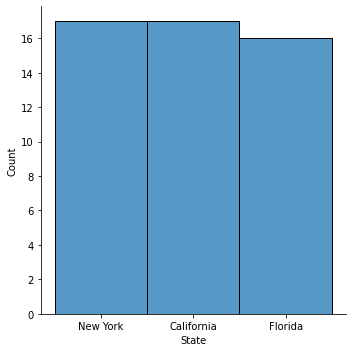

In [30]:
sns.displot(start['State'])

<AxesSubplot:>

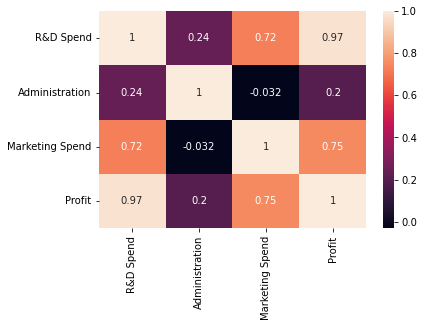

In [31]:
sns.heatmap(start.corr(),annot=True)

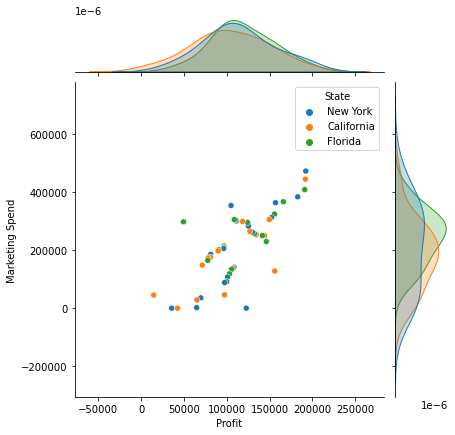

In [32]:
sns.jointplot(x="Profit",y="Marketing Spend",hue="State",data=start)

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

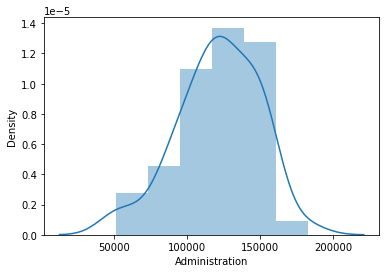

In [33]:
sns.distplot(start["Administration"])

<AxesSubplot:xlabel='Profit', ylabel='State'>

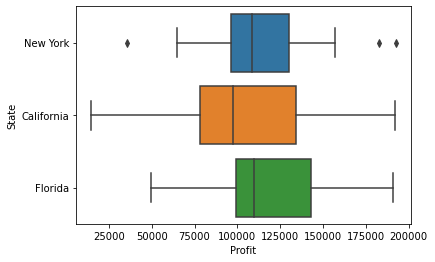

In [34]:
sns.boxplot(x=start["Profit"],y=start["State"])

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


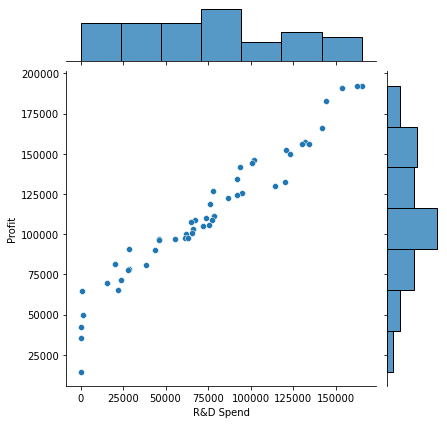

In [35]:
sns.jointplot(start["R&D Spend"],start["Profit"])

In [36]:
start=start.drop("State",axis=1)

In [37]:
start.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [38]:
x=start.drop("Profit",axis=1)
y=start["Profit"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [40]:
scale=StandardScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

In [46]:
model={"lr":LinearRegression(),
       "knn":KNeighborsRegressor() ,
       "svr":SVR(),
       "rf":RandomForestRegressor(),
       "DT":DecisionTreeRegressor()}

In [47]:
for name,model in model.items():
       print(f'using model :{name}')
       model.fit(x_train,y_train)
       print(f'train score : {model.score(x_train,y_train)}')
       print(f'testing score : {model.score(x_test,y_test)}')
       print("_"*20)

using model :lr
train score : 0.9448967202583596
testing score : 0.9679176532258635
____________________
using model :knn
train score : 0.8864220089767462
testing score : 0.7702244319486197
____________________
using model :svr
train score : -0.005310194673565638
testing score : -0.15656218066033345
____________________
using model :rf
train score : 0.9868891842251888
testing score : 0.9520511904061246
____________________
using model :DT
train score : 1.0
testing score : 0.8921936910209104
____________________


In [43]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
import joblib
joblib .dump(model,'50cent.h5')

['50cent.h5']